<a href="https://colab.research.google.com/github/bahgat-ahmed/Natural-Language-Processing-in-TensorFlow/blob/main/Course_3_Week_2_Exercise_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Exercise%20-%20Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2020-11-17 06:14:18--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.05s   

2020-11-17 06:14:19 (106 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [2]:
vocab_size = 10000 # YOUR CODE HERE
embedding_dim = 128 # YOUR CODE HERE
# max_length = # YOUR CODE HERE
# trunc_type = # YOUR CODE HERE
padding_type = 'post' # YOUR CODE HERE
oov_tok = '<OOV>' # YOUR CODE HERE
training_portion = .8

In [3]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))

153


In [7]:
with open("/tmp/bbc-text.csv", 'r') as csvfile:
    # YOUR CODE HERE
    reader = csv.reader(csvfile, delimiter=',')
    # skipping the header
    next(reader)
    for row in reader:
      labels.append(row[0])
      sentence = row[1]
      sentence = [word for word in sentence.split() if word not in stopwords]
      sentence = ' '.join(sentence)
      sentences.append(sentence)

print(len(labels))
print(len(sentences))
print(sentences[0])

4452
4452
tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cab

In [8]:
train_size = int(len(sentences) * training_portion) # YOUR CODE HERE

train_sentences = sentences[:train_size] # YOUR CODE HERE
train_labels = labels[:train_size] # YOUR CODE HERE

validation_sentences = sentences[train_size:] # YOUR CODE HERE
validation_labels = labels[train_size:] # YOUR CODE HERE

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

3561
3561
3561
891
891


In [10]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok) # YOUR CODE HERE
tokenizer.fit_on_texts(train_sentences) # YOUR CODE HERE
word_index = tokenizer.word_index # YOUR CODE HERE

train_sequences = tokenizer.texts_to_sequences(train_sentences) # YOUR CODE HERE
# I didn't specify maxlen because I want the maxlen to be the longest sentence list which is the default
train_padded = pad_sequences(train_sequences, padding=padding_type) # YOUR CODE HERE

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

449
2438
51
2438
110
2438


In [11]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences) # YOUR CODE HERE
validation_padded = pad_sequences(validation_sequences, padding=padding_type) # YOUR CODE HERE

print(len(validation_sequences))
print(validation_padded.shape)

891
(891, 2079)


In [13]:
label_tokenizer = Tokenizer() # YOUR CODE HERE
label_tokenizer.fit_on_texts(train_labels) # YOUR CODE HERE

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels)) # YOUR CODE HERE
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels)) # YOUR CODE HERE

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[4]
[4]
(3561, 1)
[3]
[4]
[5]
(891, 1)


In [14]:
model = tf.keras.Sequential([
  # YOUR CODE HERE
  tf.keras.layers.Embedding(vocab_size, embedding_dim),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

# Expected Output
# Layer (type)                 Output Shape              Param #   
# =================================================================
# embedding (Embedding)        (None, 120, 16)           16000     
# _________________________________________________________________
# global_average_pooling1d (Gl (None, 16)                0         
# _________________________________________________________________
# dense (Dense)                (None, 24)                408       
# _________________________________________________________________
# dense_1 (Dense)              (None, 6)                 150       
# =================================================================
# Total params: 16,558
# Trainable params: 16,558
# Non-trainable params: 0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 1,284,326
Trainable params: 1,284,326
Non-trainable params: 0
_________________________________________________________________


In [16]:
num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs,
                    validation_data=(validation_padded, validation_label_seq), verbose=2) # YOUR CODE HERE

Epoch 1/30
112/112 - 5s - loss: 1.6964 - accuracy: 0.2328 - val_loss: 1.6332 - val_accuracy: 0.2200
Epoch 2/30
112/112 - 5s - loss: 1.5942 - accuracy: 0.2909 - val_loss: 1.5674 - val_accuracy: 0.2189
Epoch 3/30
112/112 - 5s - loss: 1.5250 - accuracy: 0.3931 - val_loss: 1.4577 - val_accuracy: 0.6173
Epoch 4/30
112/112 - 5s - loss: 1.3769 - accuracy: 0.5835 - val_loss: 1.2190 - val_accuracy: 0.7542
Epoch 5/30
112/112 - 5s - loss: 1.1039 - accuracy: 0.7767 - val_loss: 0.9092 - val_accuracy: 0.8597
Epoch 6/30
112/112 - 5s - loss: 0.8007 - accuracy: 0.8821 - val_loss: 0.6314 - val_accuracy: 0.9282
Epoch 7/30
112/112 - 5s - loss: 0.5568 - accuracy: 0.9329 - val_loss: 0.4370 - val_accuracy: 0.9517
Epoch 8/30
112/112 - 5s - loss: 0.3906 - accuracy: 0.9545 - val_loss: 0.3145 - val_accuracy: 0.9652
Epoch 9/30
112/112 - 5s - loss: 0.2812 - accuracy: 0.9683 - val_loss: 0.2364 - val_accuracy: 0.9697
Epoch 10/30
112/112 - 5s - loss: 0.2111 - accuracy: 0.9744 - val_loss: 0.1759 - val_accuracy: 0.9798

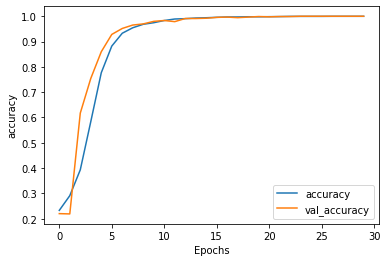

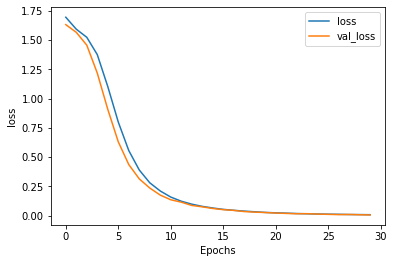

In [18]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [19]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [20]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 128)


In [21]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [22]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>